In [111]:
import pandas as pd
pd.options.mode.chained_assignment = None # Get rid of annoying warning
import numpy as np
import os
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [112]:
magatDataPath = ["/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magatDataCSPIBT_NoRandom.csv",
                 "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magatDataCSNaive.csv",
                 "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magatDataR_03.csv"][-1]

In [113]:
### Get MAGAT data for table
df = pd.read_csv(magatDataPath)
for agentNum in df["agents"].unique():
    agentDf = df.loc[df["agents"] == agentNum]
    print(agentNum, len(agentDf), agentDf["magatSucceed"].mean())
    agentDf = agentDf.loc[agentDf["magatSucceed"] == 1]
    print(agentDf["magatCost"].median())
    

50 125 1.0
1191.0
150 125 1.0
4366.0
250 125 1.0
8416.0
350 125 0.8
13860.5


In [110]:
### Get LaCAM data for table
lacamBasePath = ["/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_20seeds.csv",
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_5seeds.csv",
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_pibt_5seeds.csv",
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_tiebreak_5seeds.csv",
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_pibt_20seeds.csv",
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_naive_collision_5seeds.csv",
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_pibt_no_random_5seeds.csv",
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_manhattan_lacam_5seeds.csv",
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_manhattan_pibt_5seeds.csv"][-2]

# lacamBasePath = "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_noisy_{}_{}_5seeds.csv".format("lacam", 10)

df = pd.read_csv(lacamBasePath)
for agentNum in df["agents"].unique():
    agentDf = df.loc[df["agents"] == agentNum]
    # agentDf = agentDf.loc[agentDf["total_nodes_opened"] < 1]
    # agentDf["solved"] = (agentDf["total_nodes_opened"] < 1000) & (agentDf["solved"] == 1)
    print(agentNum, len(agentDf), agentDf["solved"].mean())
    agentDf = agentDf.loc[agentDf["solved"] == 1]
    print(len(agentDf), agentDf["soc"].median())

50 125 1.0
125 6350.0
100 125 1.0
125 23175.0
150 125 1.0
125 49225.0
200 125 1.0
125 83889.0
250 125 0.992
124 129974.0
300 125 1.0
125 186465.0
350 125 0.976
122 262838.5
400 125 0.952
119 358457.0
450 125 0.864
108 468929.5


In [35]:
###  Parsing LaCAM data
# lacamDataPath = "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_20seeds.csv"
lacamDataPath = "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_5seeds.csv"
df = pd.read_csv(lacamDataPath)
# pd.plot.hist(df["total_nodes_opened"], bins=100)
# print(df["total_nodes_opened"])
# df.boxplot(column="total_nodes_opened")
# plt.yscale("log")
df["total_nodes_opened"].max()

6894

In [65]:
def convertStringToArray(aStr):
    return [int(x) for x in aStr.split("\n")]

In [128]:
### Small teaser plot
agentNum = [50, 100, 200, 300, 400]
pibt = [0.98, 0.98, 0.83, 0.55, 0.4]
magatNaive = [0.88, 0.38, 0.0, 0.0, 0.0]
magatPibt = [1, 0.97, 0.8, 0.92, 0.88]
simpleNaive = [0, 0, 0, 0, 0]
simplePIBT = [0.92, 0.88, 0.592, 0, 0]
simpleLaCAM = [1, 1, 0.992, 0.896, 0.576]

data = {"agents": agentNum, "MAGAT": magatNaive, "MAGAT w/CS-PIBT": magatPibt, "PIBT": pibt}
        # "simpleNN": simpleNaive, "simpleNN w/LaCAM": simpleLaCAM}#}

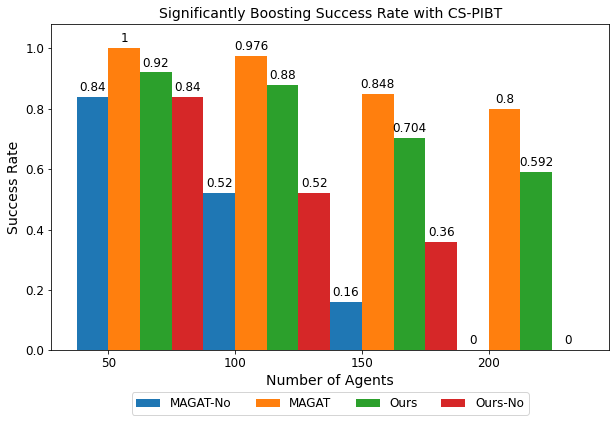

In [207]:

x = np.arange(len(agentNum))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')
fig, ax = plt.subplots(figsize=(10, 6))

for attribute, measurement in data.items():
    if attribute == "agents":
        continue
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success Rate')
ax.set_xlabel('Number of Agents')
ax.set_title('Significantly Boosting Success Rate with CS-PIBT')
ax.set_xticks(x + width - width/2, agentNum)
# ax.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11), ncol=4)
ax.set_ylim(0, 1.08)

# plt.show()
filename = "successRate.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=600)

### Effect of Action Ordering figure

In [208]:
agentNum = np.array([50, 100, 150, 200])
csPIBT = np.array([1, 0.976, 0.848, 0.8])
csPIBTNoRandom = np.array([0.84, 0.52, 0.16, 0])

ours = np.array([0.92, 0.88, 0.704, 0.592])
ourNoRandom = np.array([0.84, 0.52, 0.36, 0])

data = {"MAGAT-No": csPIBTNoRandom, "MAGAT": csPIBT,
        "Ours": ours, "Ours-No": ourNoRandom}
# data["MAGAT"] = data["MAGAT"] - data["MAGAT-No"]

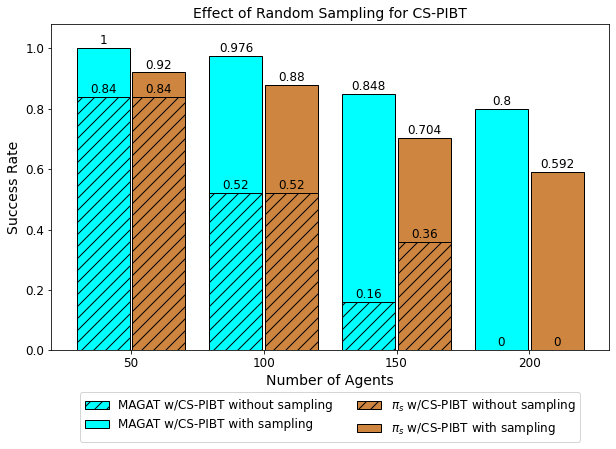

In [209]:
x = np.arange(len(agentNum))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')
fig, ax = plt.subplots(figsize=(10, 6))

# for attribute, measurement in data.items():
#     offset = width * multiplier
#     rects = ax.bar(x + offset, measurement, width, label=attribute)
#     ax.bar_label(rects, padding=3)
#     multiplier += 1
keyToKey = {"MAGAT-No": "MAGAT w/CS-PIBT with sampling", 
            "MAGAT": "MAGAT w/CS-PIBT without sampling",
            "Ours-No": "$\pi_s$ w/CS-PIBT with sampling", 
            "Ours": "$\pi_s$ w/CS-PIBT without sampling"}
for key, extraOffset, c in zip(["MAGAT", "Ours"], [-0.01, 0.01], ['cyan', 'peru']):
    offset = width * multiplier + extraOffset
    value1 = data[key]
    value2 = data[key + "-No"]
    bottom = np.zeros(len(agentNum))
    p = ax.bar(x+offset, value2, width, label=keyToKey[key], bottom=bottom, facecolor=c, edgecolor='black', hatch='//')
    ax.bar_label(p, padding=1)
    p = ax.bar(x+offset, value1-value2, width, label=keyToKey[key+"-No"], bottom=value2, edgecolor="black", facecolor=c)
    ax.bar_label(p, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success Rate')
ax.set_xlabel('Number of Agents')
ax.set_title('Effect of Random Sampling for CS-PIBT')
ax.set_xticks(x + width - width/2, agentNum)
# # ax.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11), ncol=2)
ax.set_ylim(0, 1.08)

# plt.show()
filename = "fig-random-sample.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=600)

### Plot for noise

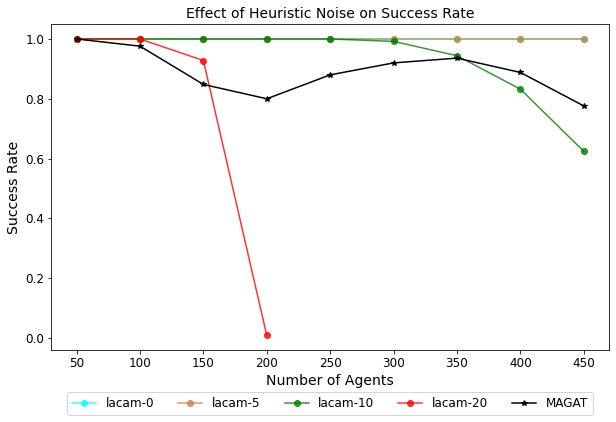

In [120]:
lacamDataFunc = lambda x, noise: "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_noisy_{}_{}_5seeds.csv".format(x, noise)

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['cyan', 'peru', 'green', 'red', 'blue']

for i, aSetting in enumerate([0, 5, 10, 20]):
    c = colors[i]
    if aSetting == 0:
        df = pd.read_csv("/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_20seeds.csv")
    elif aSetting == -1:
        df = pd.read_csv("/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_manhattan_lacam_5seeds.csv")
    else:
        df = pd.read_csv(lacamDataFunc("lacam", aSetting))

    data = []
    dataLimNodes = []
    for agentNum in df["agents"].unique():
        agentDf = df.loc[df["agents"] == agentNum]
        # agentDf = agentDf.loc[agentDf["total_nodes_opened"] < 1]
        data.append(agentDf["solved"].mean())

        tmp = (agentDf["total_nodes_opened"] < 1000) & (agentDf["solved"] == 1)
        dataLimNodes.append(tmp.mean())
    ax.plot(df["agents"].unique(), data, label="{}-{}".format("lacam", aSetting), c=c, marker='o', alpha=0.8)
    # ax.plot(df["agents"].unique(), dataLimNodes, label="{}-{}-lim".format("lacam", aSetting), c=c,
    #         linestyle='--', marker='x')

    # if aSetting == 0:
    #     df = pd.read_csv("/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_pibt_20seeds.csv")
    # elif aSetting == -1:
    #     df = pd.read_csv("/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_manhattan_pibt_5seeds.csv")
    # else:
    #     df = pd.read_csv(lacamDataFunc("pibt", aSetting))
    # data = []
    # for agentNum in df["agents"].unique():
    #     agentDf = df.loc[df["agents"] == agentNum]
    #     data.append(agentDf["solved"].mean())
    # ax.plot(df["agents"].unique(), data, label="{}-{}".format("pibt", aSetting), c=c, 
    #         linestyle=':', marker='^', alpha=0.8)

magatData = "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magatDataCSPIBT.csv"
df = pd.read_csv(magatData)
data = []
for agentNum in df["agents"].unique():
    agentDf = df.loc[(df["agents"] == agentNum)]
    data.append(agentDf["magatSucceed"].mean())
ax.plot(df["agents"].unique(), data, c="black", marker='*', label="MAGAT")
# ax.plot(np.NaN, np.NaN, '-', color='none', label=" ")
# ax.plot(np.NaN, np.NaN, '-', color='none', label=" ")

ax.set_title("Effect of Heuristic Noise on Success Rate")
ax.set_ylabel('Success Rate')
ax.set_xlabel('Number of Agents')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11), ncol=5)
filename = "fig-noise-success.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=600)

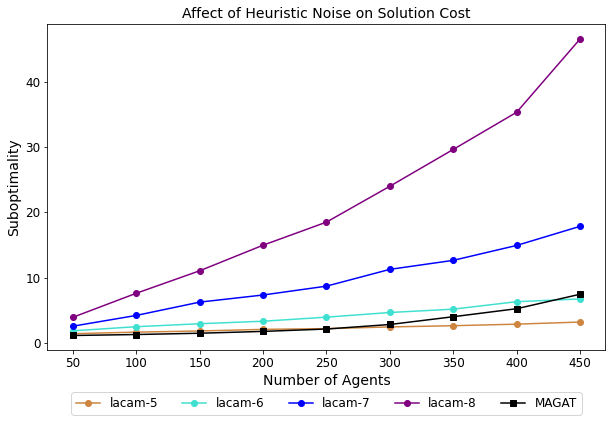

In [126]:
lacamDataFunc = lambda x, noise: "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_noisy_{}_{}_5seeds.csv".format(x, noise)
dfLowerBounds = pd.read_csv(lacamDataFunc("lacam", 1))

fig, ax = plt.subplots(figsize=(10, 6))
# colors = ['cyan', 'peru', 'green', 'red']
# for i, aSetting in enumerate([0, 5, 10, 20]):
colors = ['peru', 'turquoise', 'blue', 'purple']
for i, aSetting in enumerate([5, 6, 7, 8]):
    c = colors[i]
    if aSetting == 0:
        df = pd.read_csv("/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_20seeds.csv")
    else:
        df = pd.read_csv(lacamDataFunc("lacam", aSetting))

    data = []
    dataLimNodes = []
    for agentNum in df["agents"].unique():
        agentDf = df.loc[(df["agents"] == agentNum) & (df["solved"] == 1)]
        # agentDf = agentDf.loc[agentDf["total_nodes_opened"] < 1]
        data.append((agentDf["soc"]/agentDf["soc_lb"]).median())
    ax.plot(df["agents"].unique(), data, label="{}-{}".format("lacam", aSetting), c=c, marker='o')


magatData = "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magatDataCSPIBT.csv"
df = pd.read_csv(magatData)
df = pd.merge(df, dfLowerBounds, on=["scen_name", "agents", "seed"], how="inner") # Adds soc_lb
data = []
for agentNum in df["agents"].unique():
    agentDf = df.loc[(df["agents"] == agentNum) & (df["magatSucceed"] == 1)]
    data.append((agentDf["magatCost"]/agentDf["soc_lb"]).median())
ax.plot(df["agents"].unique(), data, c="black", marker='s', label="MAGAT")
# ax.plot(np.NaN, np.NaN, '-', color='none', label=" ")
# ax.plot(np.NaN, np.NaN, '-', color='none', label=" ")

ax.set_title("Affect of Heuristic Noise on Solution Cost")
# ax.set_yscale("log")
ax.set_ylabel('Suboptimality')
ax.set_xlabel('Number of Agents')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11), ncol=5)

filename = "fig-noise-cost-close.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=600)

### Weighted Sum

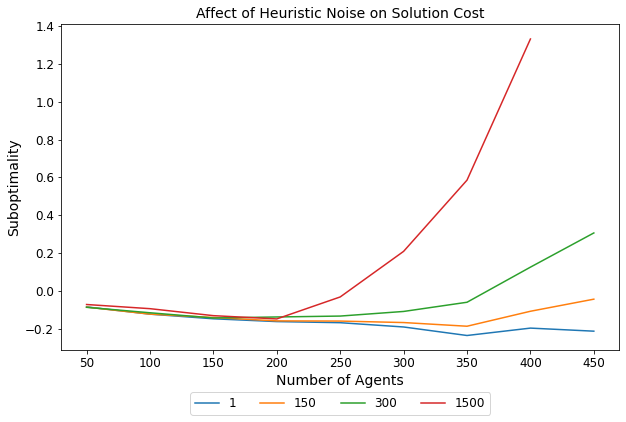

In [135]:
baseNNPath = "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_20seeds.csv"
baseDf = pd.read_csv(baseNNPath)
filePath = lambda r : "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magatR{}.csv".format(r)

numAgents = range(50, 451, 50)

fig, ax = plt.subplots(figsize=(10, 6))
## Add lines per rVal
for rVal in [1, 150, 300, 1500]:
    df = pd.read_csv(filePath(rVal))
    df = pd.merge(df, baseDf, on=["scen_name", "agents", "seed"], how="inner") # Adds soc_lb
    data = []
    for agentNum in numAgents:
        agentDf = df.loc[(df["agents"] == agentNum) & (df["magatSucceed"] == 1)]
        if (len(agentDf) == 0):
            data.append(np.nan)
            continue
        data.append(((agentDf["magatCost"]-agentDf["soc"])/agentDf["soc_lb"]).median())        
    ax.plot(numAgents, data, label="{}".format(rVal))

## Add regular LaCAM
# data = []
# for agentNum in numAgents:
#     agentDf = baseDf.loc[(baseDf["agents"] == agentNum) & (baseDf["solved"] == 1)]
#     if (len(agentDf) == 0):
#             data.append(np.nan)
#             continue
#     data.append((agentDf["soc"]/agentDf["soc_lb"]).median())        
# ax.plot(numAgents, data, label="LaCAM")


ax.set_title("Affect of Heuristic Noise on Solution Cost")
# ax.set_yscale("log")
ax.set_ylabel('Suboptimality')
ax.set_xlabel('Number of Agents')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11), ncol=5)


### Runtime Overhead

Index(['agents', 'map_file', 'scen_name', 'seed', 'solved', 'soc', 'soc_lb',
       'makespan', 'makespan_lb', 'sum_of_loss', 'sum_of_loss_lb', 'comp_time',
       'cache_hit', 'total_nodes_opened', 'map_file_base', 'solved_base',
       'soc_base', 'soc_lb_base', 'makespan_base', 'makespan_lb_base',
       'sum_of_loss_base', 'sum_of_loss_lb_base', 'comp_time_base',
       'cache_hit_base', 'total_nodes_opened_base'],
      dtype='object')


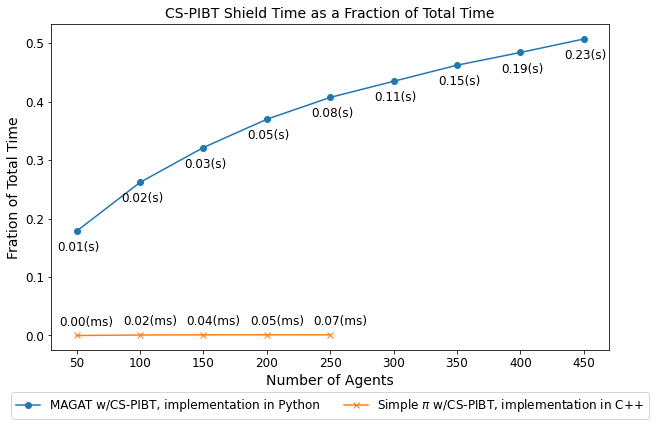

In [168]:
magatPath = "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magatR150.csv"
df = pd.read_csv(magatPath)

nnDf = pd.read_csv("/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_pibt_5seeds.csv")
baseDf = pd.read_csv("/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_pibt_20seeds.csv")
nnDf = pd.merge(nnDf, baseDf, on=["scen_name", "agents", "seed"], how="inner", suffixes=("", "_base")) # Adds soc_lb
print(nnDf.columns)

fig, ax = plt.subplots(figsize=(10, 6))
## Add lines per rVal
data = []
yVals = []
cppData = []
cppAnotate = []
for agentNum in df["agents"].unique():
    agentDf = df.loc[(df["agents"] == agentNum) & (df["magatSucceed"] == 1)]
    if (len(agentDf) == 0):
        data.append(np.nan)
        continue
    data.append((agentDf["pibtShieldTime"]/agentDf["totalTime"]).median())
    yVals.append((agentDf["pibtShieldTime"]/agentDf["magatMakespan"]).median())

    agentDf = nnDf.loc[(nnDf["agents"] == agentNum) & (nnDf["solved"] == 1)]
    if (len(agentDf) == 0):
        cppData.append(np.nan)
        continue
    totalPer = agentDf["comp_time"]/agentDf["total_nodes_opened"]
    cspibtPer = agentDf["comp_time_base"]/agentDf["total_nodes_opened_base"]
    cppAnotate.append(cspibtPer.median())
    cppData.append((cspibtPer/totalPer).median())
ax.plot(numAgents, data, label="MAGAT w/CS-PIBT, implementation in Python", marker='o')
ax.plot(numAgents, cppData, label="Simple $\pi$ w/CS-PIBT, implementation in C++", marker='x')

# Add annotations
for i, a in enumerate(yVals):
    if np.isnan(a):
        continue
    ax.annotate("{:.2f}(s)".format(a), (numAgents[i], data[i]), textcoords="offset points", xytext=(2, -20), ha='center')

for i, a in enumerate(cppAnotate):
    if np.isnan(a):
        continue
    ax.annotate("{:.2f}(ms)".format(a), (numAgents[i], cppData[i]), textcoords="offset points", xytext=(10, 10), ha='center')

ax.set_title("CS-PIBT Shield Time as a Fraction of Total Time")
# ax.set_yscale("log")
ax.set_ylabel('Fration of Total Time')
ax.set_xlabel('Number of Agents')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11), ncol=5)